In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from scipy import stats

In [9]:
def get_ref():
    """returns a DataFrame containing all the reference structure values"""
    clash_df = pd.read_csv("data/reference-clashes.csv", index_col = 0)
    cor_df = pd.read_csv("data/reference-correlation.csv", index_col = 0)
    ref_df = clash_df.join(cor_df["correlation"])
    return ref_df

def get_ref_cor():
    cor_df = pd.read_csv("data/reference-correlation.csv", index_col = 0)
    return cor_df

def make_water_df_list(run):
    
    df_3J95 = pd.read_csv(("../RAW_DATA/{}/3J95_correlation.csv").format(run), index_col = "structure")
    df_3J96 = pd.read_csv(("../RAW_DATA/{}/3J96_correlation.csv").format(run), index_col = "structure")
    df_5GRS = pd.read_csv(("../RAW_DATA/{}/5GRS_correlation.csv").format(run), index_col = "structure")
    df_5HNY = pd.read_csv(("../RAW_DATA/{}/5HNY_correlation.csv").format(run), index_col = "structure")
    df_5WCB = pd.read_csv(("../RAW_DATA/{}/5WCB_correlation.csv").format(run), index_col = "structure")
    df_6ACG = pd.read_csv(("../RAW_DATA/{}/6ACG_correlation.csv").format(run), index_col = "structure")
    df_6AHF = pd.read_csv(("../RAW_DATA/{}/6AHF_correlation.csv").format(run), index_col = "structure")
    df_6IRF = pd.read_csv(("../RAW_DATA/{}/6IRF_correlation.csv").format(run), index_col = "structure")
    df_6N1Q = pd.read_csv(("../RAW_DATA/{}/6N1Q_correlation.csv").format(run), index_col = "structure")
    df_6N7G = pd.read_csv(("../RAW_DATA/{}/6N7G_correlation.csv").format(run), index_col = "structure")
    df_6N8Z = pd.read_csv(("../RAW_DATA/{}/6N8Z_correlation.csv").format(run), index_col = "structure")
    df_6R7I = pd.read_csv(("../RAW_DATA/{}/6R7I_correlation.csv").format(run), index_col = "structure")
    df_6UBY = pd.read_csv(("../RAW_DATA/{}/6UBY_correlation.csv").format(run), index_col = "structure")
    df_6UC0 = pd.read_csv(("../RAW_DATA/{}/6UC0_correlation.csv").format(run), index_col = "structure")
    
    df_list = [
        df_3J95,
        df_3J96,
        df_5GRS,
        df_5HNY,
        df_5WCB,
        df_6ACG,
        df_6AHF,
        df_6IRF,
        df_6N1Q,
        df_6N7G,
        df_6N8Z,
        df_6R7I,
        df_6UBY,
        df_6UC0,
    ]
    
    return df_list

def probe_ref():
    """returns a DataFrame containing all the reference structure values"""
    probe_df = pd.read_csv("data/ref-probe.csv", index_col = 0)
    return probe_df


def make_probe_list(run):
    
    df_3J95 = pd.read_csv(("../RAW_DATA/{}/3J95_probe.csv").format(run), index_col = "structure")
    df_3J96 = pd.read_csv(("../RAW_DATA/{}/3J96_probe.csv").format(run), index_col = "structure")
    df_5GRS = pd.read_csv(("../RAW_DATA/{}/5GRS_probe.csv").format(run), index_col = "structure")
    df_5HNY = pd.read_csv(("../RAW_DATA/{}/5HNY_probe.csv").format(run), index_col = "structure")
    df_5WCB = pd.read_csv(("../RAW_DATA/{}/5WCB_probe.csv").format(run), index_col = "structure")
    df_6ACG = pd.read_csv(("../RAW_DATA/{}/6ACG_probe.csv").format(run), index_col = "structure")
    df_6AHF = pd.read_csv(("../RAW_DATA/{}/6AHF_probe.csv").format(run), index_col = "structure")
    df_6IRF = pd.read_csv(("../RAW_DATA/{}/6IRF_probe.csv").format(run), index_col = "structure")
    df_6N1Q = pd.read_csv(("../RAW_DATA/{}/6N1Q_probe.csv").format(run), index_col = "structure")
    df_6N7G = pd.read_csv(("../RAW_DATA/{}/6N7G_probe.csv").format(run), index_col = "structure")
    df_6N8Z = pd.read_csv(("../RAW_DATA/{}/6N8Z_probe.csv").format(run), index_col = "structure")
    df_6R7I = pd.read_csv(("../RAW_DATA/{}/6R7I_probe.csv").format(run), index_col = "structure")
    df_6UBY = pd.read_csv(("../RAW_DATA/{}/6UBY_probe.csv").format(run), index_col = "structure")
    df_6UC0 = pd.read_csv(("../RAW_DATA/{}/6UC0_probe.csv").format(run), index_col = "structure")
    
    df_list = [
        df_3J95,
        df_3J96,
        df_5GRS,
        df_5HNY,
        df_5WCB,
        df_6ACG,
        df_6AHF,
        df_6IRF,
        df_6N1Q,
        df_6N7G,
        df_6N8Z,
        df_6R7I,
        df_6UBY,
        df_6UC0,
    ]
    
    return df_list

,HADDOCK-score,correlation,atomic-clashes,resolution
HADDOCK-score,1.000000,-0.164729,0.629320,-0.438056
correlation,-0.164729,1.000000,-0.257792,0.690833
atomic-clashes,0.629320,-0.257792,1.000000,-0.342114
resolution,-0.438056,0.690833,-0.342114,1.000000


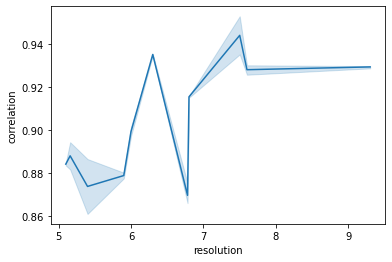

In [10]:
df_list = make_water_df_list("SA_CTRD")

map_res_df = pd.read_csv(("data/reference-resolution.csv"), index_col="structure")
data_frame = pd.DataFrame()
for df in iter(df_list):
        structure = df.index[0][:4]
        df = df.sort_values("HADDOCK-score")[0:4].reset_index().drop("structure", axis=1)
        ref = []
        for i in range(4):
            ref.append(map_res_df.loc[structure, "resolution"])
            
        df["resolution"] = ref
        data_frame = pd.concat([data_frame, df], ignore_index=True)
        
sns.lineplot(y="correlation", x="resolution", data=data_frame)

data_frame.corr()

,correlation,resolution,HADDOCK-score,atomic-clashes
0,0.9289,7.6,NaN,NaN
1,0.9276,7.6,NaN,NaN
2,0.9255,7.6,NaN,NaN
3,0.9314,7.6,NaN,NaN
4,0.9110,7.6,NaN,NaN
...,...,...,...,...
163,0.9562,NaN,-1444.883202,3.0
164,0.9304,NaN,-1339.826300,0.0
165,0.9316,NaN,-1339.277100,1.0
166,0.9347,NaN,-1332.721000,0.0


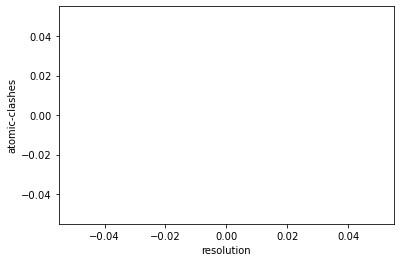

In [27]:
df_list = make_probe_list("run-no-ambig")

map_res_df = pd.read_csv(("data/reference-resolution.csv"), index_col="structure")
data_frame_probe = pd.DataFrame()
for df in iter(df_list):
        structure = df.index[0][:4]
        df = df.reset_index().drop("structure", axis=1)
                            
        data_frame_probe = pd.concat([data_frame_probe, df], ignore_index=True)
        

data_frame

,HADDOCK-score,correlation,atomic-clashes,resolution
0,-1555.860600,0.9289,0,7.60
1,-1543.774500,0.9276,0,7.60
2,-1537.539600,0.9255,0,7.60
3,-1518.933900,0.9314,2,7.60
4,-4207.025870,0.9110,1,7.60
5,-4146.728630,0.9111,1,7.60
6,-4142.654300,0.9072,1,7.60
7,-4141.211500,0.9097,2,7.60
8,-2603.016731,0.8519,1,5.40
9,-2597.789876,0.8460,2,5.40


In [28]:
data_frame_probe
new_df = pd.concat([data_frame, data_frame_probe], axis = 1)
new_df.corr()

,HADDOCK-score,correlation,atomic-clashes,resolution,probe-score,probe-score/A**2
HADDOCK-score,1.000000,-0.150761,0.588069,-0.462737,-0.893136,-0.710912
correlation,-0.150761,1.000000,-0.354071,0.681627,0.224112,-0.068459
atomic-clashes,0.588069,-0.354071,1.000000,-0.346971,-0.649532,-0.422715
resolution,-0.462737,0.681627,-0.346971,1.000000,0.372464,0.065772
probe-score,-0.893136,0.224112,-0.649532,0.372464,1.000000,0.791763
probe-score/A**2,-0.710912,-0.068459,-0.422715,0.065772,0.791763,1.000000
